In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
!unzip /content/drive/MyDrive/CopieCarDD_release.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000371.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000372.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000373.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000374.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000375.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000377.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000379.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000380.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000382.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000383.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000384.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000386.png  
  inflating: CarDD_release/CarDD_SOD/CarDD-TR/

In [5]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-1wt09p_r
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-1wt09p_r
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375549 sha256=a8c7400dc930ffcb7e50c981e5494b663ce3ff40b837f9faca21463339a0cd59
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7ook04s/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [6]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [7]:
dataDir='/content/CarDD_release/CarDD_COCO/annotations'
dataType='instances_val2017'
annFile='{}/{}.json'.format(dataDir,dataType)
img_dir = "/content/CarDD_release/CarDD_COCO/val2017"

In [8]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


In [9]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

COCO categories for damages: 
dent, scratch, crack, glass shatter, lamp broken, tire flat



**Display image with damage annotation**

In [10]:
catIds = coco.getCatIds(catNms=['crack'])
imgIds = coco.getImgIds(catIds=catIds )
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

84 image id was selected at random from the [516, 13, 2573, 3090, 531, 538, 1563, 3614, 34, 35, 3110, 552, 2602, 2605, 561, 571, 575, 576, 1087, 578, 2636, 2637, 1614, 1619, 84, 1108, 86, 1109, 89, 1120, 1124, 102, 1128, 1643, 1652, 1141, 2682, 2172, 2176, 130, 3204, 1670, 1672, 1674, 146, 149, 3222, 3735, 157, 2721, 2268, 2269, 1246, 2272, 2276, 2280, 1770, 239, 241, 243, 244, 2297, 3833, 1794, 1285, 2828, 3340, 270, 784, 2325, 2338, 2342, 2343, 2346, 3372, 2868, 3382, 2361, 832, 2892, 2381, 857, 2909, 1379, 2408, 3432, 3438, 2933, 2934, 3447, 1912, 3448, 891, 892, 1927, 906, 3470, 3475, 2452, 3991, 3481, 1947, 928, 1440, 930, 1442, 932, 2996, 3510, 3512, 1980, 3521, 2503, 1994, 3020, 1997, 2516, 1494, 3543, 2521, 495, 2553] list


In [11]:
imgId = coco.getImgIds(imgIds = [random_img_id])
annId = coco.getAnnIds(imgIds=imgId,iscrowd=None)
img = coco.loadImgs(imgId)[0]
anns = coco.loadAnns(annId)
print("Image details \n",img)

Image details 
 {'id': 84, 'width': 1000, 'height': 667, 'file_name': '000084.jpg', 'license': 0}


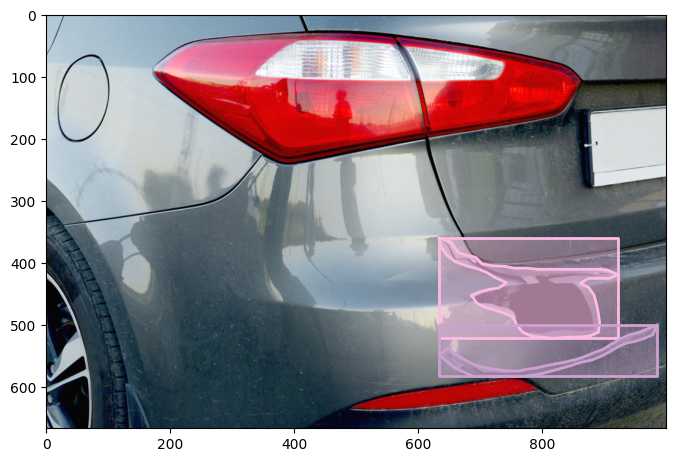

In [12]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('on')
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True )

**Detectron2 Model training**

In [13]:
# Install detectron 2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bbqi44cs
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bbqi44cs
  Resolved https://github.com/facebookresearch/detectron2.git to commit 864913f0e57e87a75c8cc0c7d79ecbd774fc669b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2

In [14]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.1.0+cu121 True


In [15]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [16]:
!python -m detectron2.utils.collect_env

-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy                            1.23.5
detectron2                       0.6 @/usr/local/lib/python3.10/dist-packages/detectron2
Compiler                         GCC 11.4
CUDA compiler                    CUDA 12.2
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.1.0+cu121 @/usr/local/lib/python3.10/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver version                   535.104.05
CUDA_HOME                        /usr/local/cuda
Pillow                           9.4.0
torchvision                      0.16.0+cu121 @/usr/local/lib/python3.10/dist-packages/torch

In [17]:
dataset_dir = "/content/CarDD_release/CarDD_COCO/"
ann_dir ="annotations/"
img_train_dir = "train2017/"
img_val_dir = "val2017/"

In [18]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {},"/content/CarDD_release/CarDD_COCO/annotations/instances_train2017.json" , "/content/CarDD_release/CarDD_COCO/train2017/")
register_coco_instances("car_dataset_val", {}, "/content/CarDD_release/CarDD_COCO/annotations/instances_val2017.json", "/content/CarDD_release/CarDD_COCO/val2017/")
register_coco_instances("car_dataset_test", {}, "/content/CarDD_release/CarDD_COCO/annotations/instances_test2017.json","/content/CarDD_release/CarDD_COCO/test2017/" )

In [19]:
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

[01/21 19:23:51 d2.data.datasets.coco]: Loaded 2816 images in COCO format from /content/CarDD_release/CarDD_COCO/annotations/instances_train2017.json


In [20]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [21]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 10000 #We found that with a patience of 500, training will early stop before 10,000 iterations
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 27 # 26 letters plus one super class
cfg.TEST.EVAL_PERIOD = 0 # Increase this number if you want to monitor validation performance during training

PATIENCE = 500 #Early stopping will occur after N iterations of no imporovement in total_loss


# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/21 19:23:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 106MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[01/21 19:23:57 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/21 19:24:16 d2.utils.events]:  eta: 1:22:39  iter: 19  total_loss: 4.445  loss_cls: 3.501  loss_box_reg: 0.1426  loss_mask: 0.6939  loss_rpn_cls: 0.08056  loss_rpn_loc: 0.02378    time: 0.5090  last_time: 0.5068  data_time: 0.0311  last_data_time: 0.0041   lr: 4.9953e-06  max_mem: 2577M
[01/21 19:24:32 d2.utils.events]:  eta: 1:22:59  iter: 39  total_loss: 4.255  loss_cls: 3.308  loss_box_reg: 0.1444  loss_mask: 0.6919  loss_rpn_cls: 0.03696  loss_rpn_loc: 0.02507    time: 0.5110  last_time: 0.5246  data_time: 0.0094  last_data_time: 0.0146   lr: 9.9902e-06  max_mem: 2577M
[01/21 19:24:42 d2.utils.events]:  eta: 1:21:37  iter: 59  total_loss: 3.843  loss_cls: 2.877  loss_box_reg: 0.1279  loss_mask: 0.691  loss_rpn_cls: 0.05441  loss_rpn_loc: 0.02244    time: 0.4999  last_time: 0.4808  data_time: 0.0073  last_data_time: 0.0064   lr: 1.4985e-05  max_mem: 2615M
[01/21 19:24:52 d2.utils.events]:  eta: 1:21:28  iter: 79  total_loss: 3.259  loss_cls: 2.24  loss_box_reg: 0.1495  loss_mask

In [26]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val", )
predictor = DefaultPredictor(cfg)

[01/21 21:01:08 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [27]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val")

[01/21 21:01:15 d2.data.datasets.coco]: Loaded 810 images in COCO format from /content/CarDD_release/CarDD_COCO/annotations/instances_val2017.json


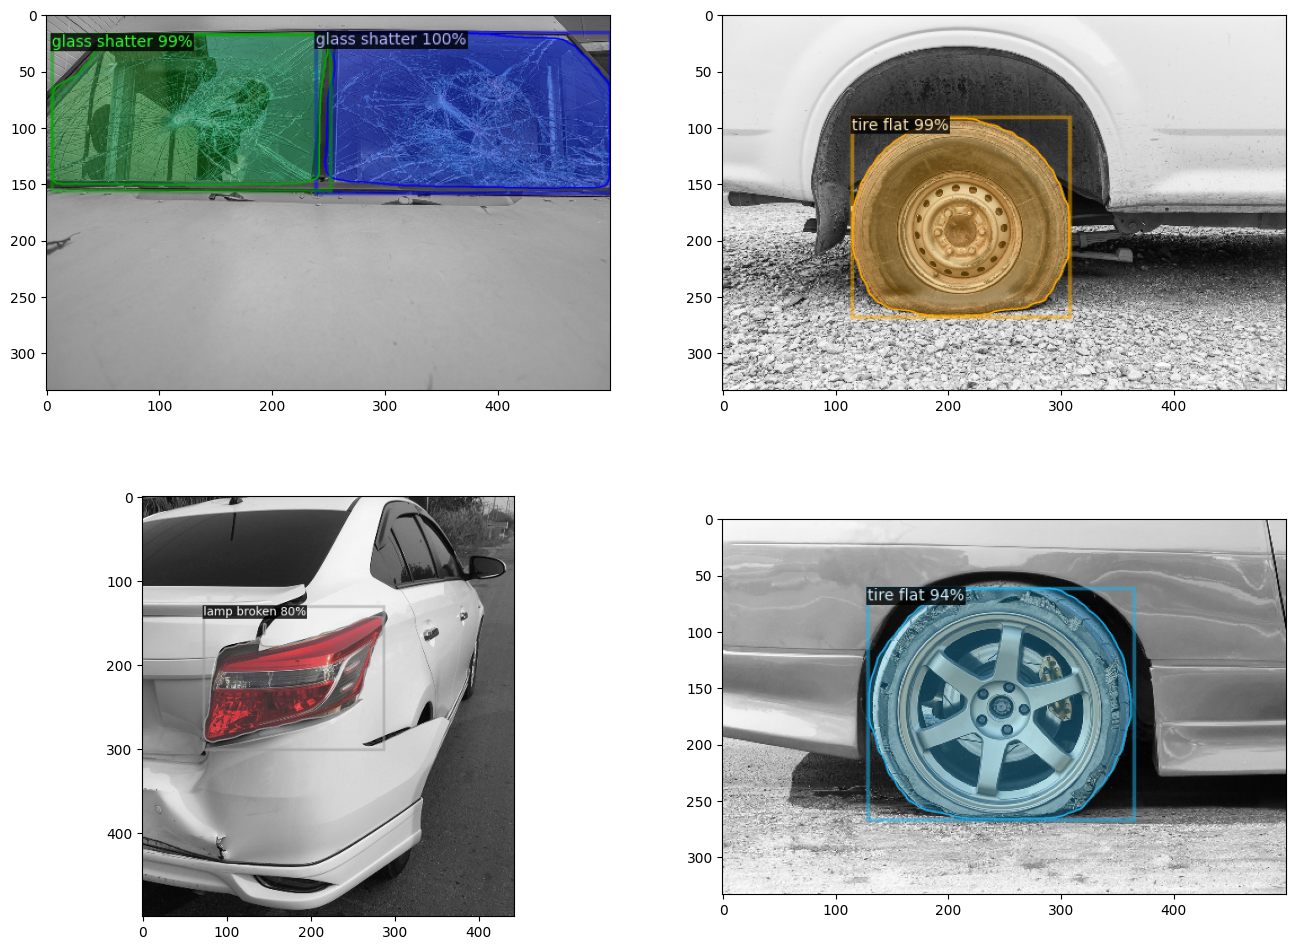

In [30]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(val_dataset_dicts, 4):
    i=i+1
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])